# Homework 8: Advection and Diffusion

#### Objective:
In this homework, we will investigate the comparative magnitudes of advection and diffusion of heat in the ocean. For this exercise, we will rely on output from a model that we have compiled and run in class. If you have not already done so, you will need to compile and run the `global_with_exf` verification experiment according to the steps on the handout from Lecture 8-2.

#### Import Modules:
Begin by importing the modules to read in data, conduct calculations, and make plots.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

Define a path to your run directory where you will store data for this exercise.

In [2]:
run_folder = 'C:\\Users\\azure\\Documents\\CS185C\\MITgcm\\verification\\global_with_exf\\run'

## Part 1: The Heat Equation
In the space below, write down the equation that describes the evolution of temperature in the ocean. Then, for each term in the equation, write one sentence to describe what the term means qualitatively.

$$
\frac{\partial \theta}{\partial t} = -\mathbf{u} \cdot \nabla \theta + k \frac{\partial^2 \theta}{\partial z^2} + \frac{J_H}{C_p \rho_w}
$$
1. **$\frac{\partial \theta}{\partial t}$**: This is the change of potential temeprature ($\theta$) with respect to time. It shows how the temperature at a specific point in the ocean changes over time.

2. **$-\mathbf{u} \cdot \nabla \theta$**: This term represents the advection of heat by ocean currents, where $\mathbf{u}$ is the velocity vector.  It models how temperature changes as the water in the ocean moves.

3. **$k \frac{\partial^2 \theta}{\partial z^2}$**: This term represents diffusion, where $k$ is the thermal diffusivity. This represents how heat transfers

4. **$\frac{J_H}{C_p \rho_w}$**: This term represents external factors like sea ice cooling, solar radiation, etc.

## Part 2: Considering Temperature
In class, we wrote the temperature equation with the symbol $\Theta$. What does this term signify and why do we use it instead of temperature $T$?

This term represents potential temprature, and the reason that we use potential temperature is because it is easier to track in the ocean, isn't affected by dynamics, and is easier for models to compute and represent in comparison to temperature.

## Part 3: Read in the data
This section will leverage the `ADVx_TH`, `ADVy_TH`, `DFxE_TH` and `DFyE_TH` variables generated from the `global_with_exf`model. These files refer to the $x$- and $y$-components of advection and diffusion (vector quantities). The $x$-component is aligned roughly eastward and the $y$-component is aligned roughly northward near the equator. Read in the 4 advection and diffusion fields. The units of these fields are  $^{\circ}$C$\cdot$m$^3$/s - a transport of temperature with volume. The quantity can by converted to a heat flux (in units of $W$) by considering specific heat ($C_p$) and the density $\rho_w$ of seawater. It is not necessary to make this conversion in this homework.

In addition to the 4 fields above, also read in the fields `XC` and `YC` grids generated by the model in your run directory:

In [3]:
n_rows = 40
n_cols = 90
n_depth_levels = 15

# if you ran you model according to the class directions,
# you should have these files to read in and no other
# changes are required in this cell

ADVx_TH_file = os.path.join(run_folder,'diags','ADVx_TH','ADVx_TH.0000000690.data')
ADVx_TH = np.fromfile(ADVx_TH_file, '>f4').reshape((n_depth_levels, n_rows, n_cols))

ADVy_TH_file = os.path.join(run_folder,'diags','ADVy_TH', 'ADVy_TH.0000000690.data')
ADVy_TH = np.fromfile(ADVy_TH_file, '>f4').reshape((n_depth_levels, n_rows, n_cols))

DFxE_TH_file = os.path.join(run_folder,'diags','DFxE_TH', 'DFxE_TH.0000000690.data')
DFxE_TH = np.fromfile(DFxE_TH_file, '>f4').reshape((n_depth_levels, n_rows, n_cols))

DFyE_TH_file = os.path.join(run_folder,'diags','DFyE_TH', 'DFyE_TH.0000000690.data')
DFyE_TH = np.fromfile(DFyE_TH_file, '>f4').reshape((n_depth_levels, n_rows, n_cols))

XC_file = os.path.join(run_folder,'XC.data')
XC = np.fromfile(XC_file, '>f4').reshape((n_rows, n_cols))

YC_file = os.path.join(run_folder,'YC.data')
YC = np.fromfile(YC_file, '>f4').reshape((n_rows, n_cols))

Subset the variables to the first depth level ($k=0$):

In [4]:
ADVx_TH = np.array(ADVx_TH[0,:,:])
ADVy_TH = np.array(ADVy_TH[0,:,:])
DFxE_TH = np.array(DFxE_TH[0,:,:])
DFyE_TH = np.array(DFyE_TH[0,:,:])

## Part 4: Plot of advection and diffusion
Next, plot the vector components of advection and diffusion in a 2x2 grid of plots. In creating your plot, be sure to do the following:
- Use the `vmin` and `vmax` values in the `pcolormesh` plotting command to control the minimum and maximum values of the plot. Each pair of plots ($x$- and $y$- components for advection, $x$- and $y$- components for diffusion) should use the same bounds. You color bounds should fit the data appropriately and the min and max values should match (-1*min = max). You may find the functions `np.min()` and `np.max()` helpful.
- Add a colorbar and use a divergent colormap, such as 'seismic' or something similar.
- Add labels to your axes and a title on each subplot

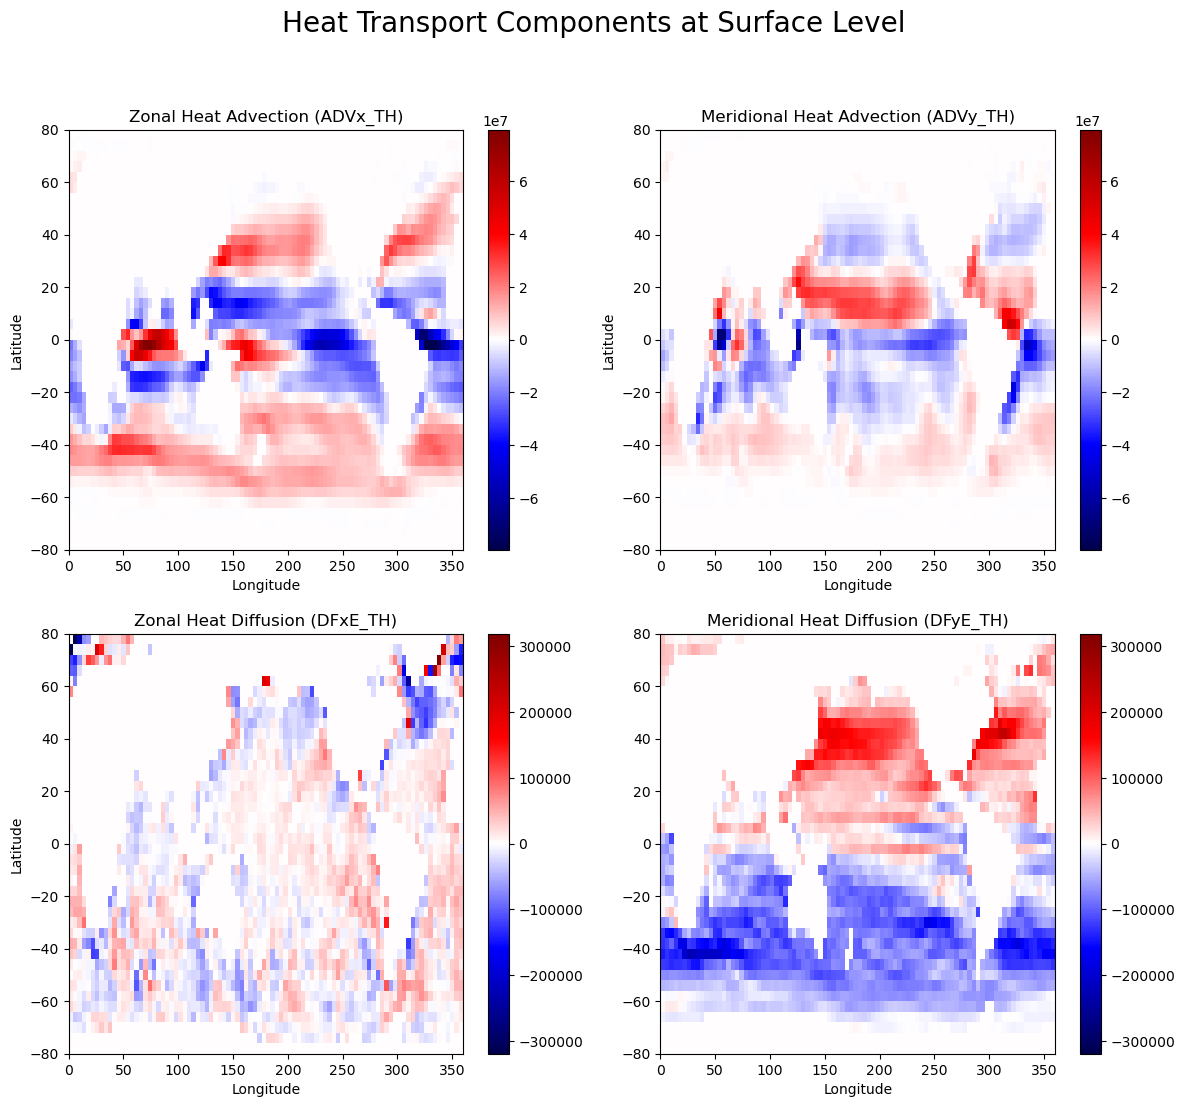

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('Heat Transport Components at Surface Level', fontsize=20)


adv_max = max(np.max(ADVx_TH), np.max(ADVy_TH))
adv_vmax = np.percentile(adv_max, 99) 
adv_vmin = -adv_vmax

diff_max = max(np.max(DFxE_TH), np.max(DFyE_TH))
diff_vmax = np.percentile(diff_max, 99)
diff_vmin = -diff_vmax

im1 = axs[0,0].pcolormesh(XC, YC, ADVx_TH, cmap='seismic',  vmin=adv_vmin, vmax=adv_vmax)
axs[0,0].set_title('Zonal Heat Advection (ADVx_TH)')
axs[0,0].set_ylabel('Latitude')
axs[0,0].set_xlabel('Longitude')
fig.colorbar(im1, ax=axs[0,0], orientation='vertical')

im2 = axs[0,1].pcolormesh(XC, YC, ADVy_TH, cmap='seismic', vmin=adv_vmin, vmax=adv_vmax)
axs[0,1].set_title('Meridional Heat Advection (ADVy_TH)')
axs[0,1].set_ylabel('Latitude')
axs[0,1].set_xlabel('Longitude')
fig.colorbar(im2, ax=axs[0,1], orientation='vertical')

im3 = axs[1,0].pcolormesh(XC, YC, DFxE_TH, cmap='seismic', vmin=diff_vmin, vmax=diff_vmax)
axs[1,0].set_title('Zonal Heat Diffusion (DFxE_TH)')
axs[1,0].set_xlabel('Longitude')
axs[1,0].set_ylabel('Latitude')
fig.colorbar(im3, ax=axs[1,0], orientation='vertical')

im4 = axs[1,1].pcolormesh(XC, YC, DFyE_TH, cmap='seismic', vmin=diff_vmin, vmax=diff_vmax)
axs[1,1].set_title('Meridional Heat Diffusion (DFyE_TH)')
axs[1,1].set_xlabel('Longitude')
axs[1,0].set_ylabel('Latitude')
fig.colorbar(im4, ax=axs[1,1], orientation='vertical')

plt.show()

## Part 5: Plot Magnitudes
To compare the differences advection and diffusion, we first need to compute the magnitude. The magnitude of a vector quantity is given by

$$
|\textbf{v}| = \sqrt{v_x^2 + v_y^2}
$$

Apply this formula to the fields above to produce fields of 2D advection and diffusion at the surface of the ocean.

In [6]:
# conduct your calculation here
adv_magnitude = np.sqrt(ADVx_TH**2 + ADVy_TH**2)
diff_magnitude = np.sqrt(DFxE_TH**2 + DFyE_TH**2)

Now, plot the magnitudes of advection and diffusion. Since we are now working with magnitude rather than directional values, you should use a sequential colormap rather than a divergent colormap.

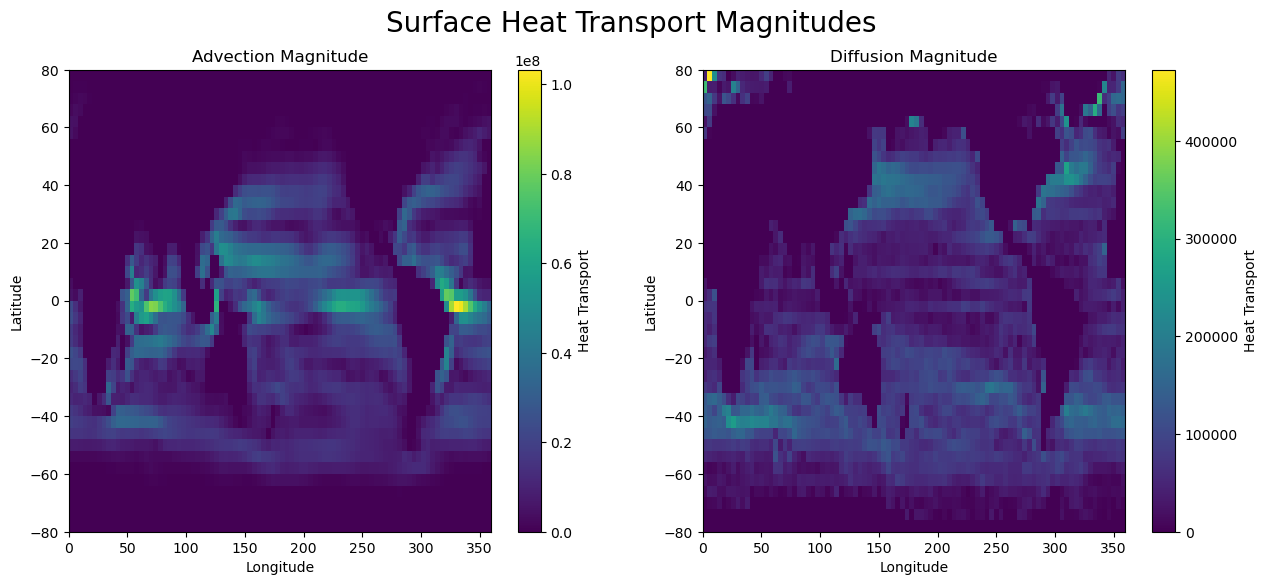

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Surface Heat Transport Magnitudes', fontsize=20)

im1 = ax1.pcolormesh(XC, YC, adv_magnitude, cmap='viridis', shading='auto')
ax1.set_title('Advection Magnitude')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
cbar1 = fig.colorbar(im1, ax=ax1)
cbar1.set_label('Heat Transport')

im2 = ax2.pcolormesh(XC, YC, diff_magnitude, cmap='viridis', shading='auto')
ax2.set_title('Diffusion Magnitude')
ax2.set_ylabel('Latitude')
ax2.set_xlabel('Longitude')
cbar2 = fig.colorbar(im2, ax=ax2)
cbar2.set_label('Heat Transport')  

plt.show()

What is the mean ratio between advection and diffusion of temperature? Do a quick calculation below to compute the ratio. Be sure not to include points on land where the magnitude of each is 0.

In [8]:
ocean_mask = (adv_magnitude > 0) & (diff_magnitude > 0)

ratio = np.where(ocean_mask, adv_magnitude / diff_magnitude, np.nan)

ratio = np.full_like(adv_magnitude, np.nan)

ratio[ocean_mask] = adv_magnitude[ocean_mask] / diff_magnitude[ocean_mask]

mean_ratio = np.nanmean(ratio)

print(f"Mean advection/diffusion ratio: {mean_ratio:.2f}")

Mean advection/diffusion ratio: 348.74


C:\Users\azure\AppData\Local\Temp\ipykernel_3924\196306993.py:3: RuntimeWarning: divide by zero encountered in divide
  ratio = np.where(ocean_mask, adv_magnitude / diff_magnitude, np.nan)
C:\Users\azure\AppData\Local\Temp\ipykernel_3924\196306993.py:3: RuntimeWarning: invalid value encountered in divide
  ratio = np.where(ocean_mask, adv_magnitude / diff_magnitude, np.nan)


## Part 6: Advection vs Diffusion
In the calculation above, we see that one process is responsible for transporting much more heat than the other. Which process is larger?

Suppose you would like to simplify the ocean model to be less computationally expensive. One way that you could achieve this is by removing processes from the model which have less of an effect on the model behavior than others. Based on the above plots and calculations, which process would you remove? Specifically, in the equation written in part 1, which term would you cancel from the equation?

Advection is dramatically larger than diffusion by a ratio of almost 250 times. Based on this, the diffusion term should be removed since the contribution is insignificant compared to advection. In other words, this term should be removed. 
$k \frac{\partial^2 \theta}{\partial z^2}$